In [1]:
import Bio
from Bio import Phylo
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
import pylab
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot
import pygraphviz as pgv
from networkx.drawing.nx_pydot import graphviz_layout
from networkx import all_pairs_shortest_path_length
import hyperlib
from hyperlib.embedding.treerep import treerep
from hyperlib.embedding.sarkar import sarkar_embedding
from hyperlib.utils.multiprecision import poincare_dist
from hyperlib.utils.multiprecision import poincare_reflect0
from hyperlib.manifold.lorentz import Lorentz
from hyperlib.manifold.poincare import Poincare
import mpmath as mpm
from scipy.special import expit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding

In [2]:
#pip install hyperlib --user

In [3]:
#pip install tensorflow-datasets

In [4]:
#conda install --channel conda-forge pygraphviz

In [5]:
#conda update -n base -c defaults conda

In [6]:
file_name = './test_aln_na.fa'
file_format = 'fasta'

In [7]:
aln = AlignIO.read(file_name, file_format)
#print(aln)

In [8]:
labels = {i:seq.id for i, seq in enumerate(aln)}
#labels

sotto il modulo treeconstruction di Phylo c'è questo DistanceCalculator che calcola automaticamente le distanze secondo un modello dato come input, 'identity' di default.
il metodo get_distance produce un oggetto di tipo DistanceMatrix, che va quindi converito con numpy.

In [9]:
calc = DistanceCalculator('trans')
dm = calc.get_distance(aln)
#print(dm)
type(dm)

Bio.Phylo.TreeConstruction.DistanceMatrix

In [10]:
dist_mat = np.array(dm)
dist_mat

array([[0.        , 0.        , 0.        , 0.        , 0.00076628,
        0.00038314, 0.00038314, 0.00038314, 0.00038314, 0.00076628,
        0.00038314, 0.00076628, 0.00038314, 0.00038314, 0.00114943,
        0.00076628, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
        0.00114943, 0.00153257, 0.00114943, 0.00114943, 0.00114943,
        0.00114943, 0.00153257, 0.00153257, 0.00153257],
       [0.        , 0.        , 0.        , 0.        , 0.00076628,
        0.00038314, 0.00038314, 0.00038314, 0.00038314, 0.00076628,
        0.00038314, 0.00076628, 0.00038314, 0.00038314, 0.00114943,
        0.00076628, 0.00114943, 0.00114943, 0.00114943, 0.00114943,
        0.00114943, 0.00153257, 0.00114943, 0.00114943, 0.00114943,
        0.00114943, 0.00153257, 0.00153257, 0.00153257],
       [0.        , 0.        , 0.        , 0.        , 0.00076628,
        0.00038314, 0.00038314, 0.00038314, 0.00038314, 0.00076628,
        0.00038314, 0.00076628, 0.00038314, 0.00038314, 0.00114943,
  

In [11]:
#tree = Phylo.read('strain_tree.nwk', 'newick')
#tree.ladderize()
#Phylo.draw(tree)
#type(tree)
#leaves = tree.get_terminals()
#dist_mat = np.array([[tree.distance(leaf1, leaf2 ) for leaf2 in leaves] for leaf1 in leaves])
#dist_mat

In [12]:
constructor = DistanceTreeConstructor()
ptree = constructor.upgma(dm)
ptree.ladderize()
#Phylo.draw(ptree)

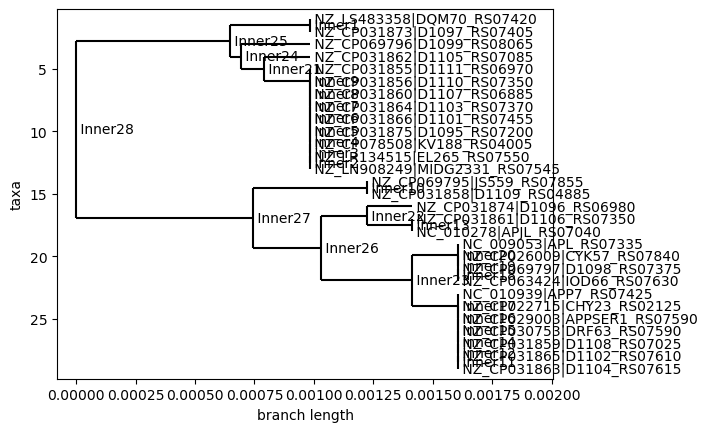

In [13]:
Phylo.draw(ptree)

In [14]:
htree = treerep(dist_mat,return_networkx = True, tol = 0.0000000000000000000000001)
htree


In [15]:
pesi_aggiornati = [(edge[0], edge[1], {'weight' : expit(htree.get_edge_data(edge[0], edge[1])['weight'])}) for edge in list(htree.edges)]
#pesi_aggiornati

In [16]:
for i in pesi_aggiornati:
    htree.update([i])
htree.get_edge_data(4, 49)

In [17]:
htree[3]

AtlasView({0: {'weight': 0.5}, 1: {'weight': 0.5}, 2: {'weight': 0.5}, 32: {'weight': 0.5000718390799654}})

In [18]:
htgraph = nx.nx_agraph.to_agraph(htree)

In [19]:
#htgraph.layout?

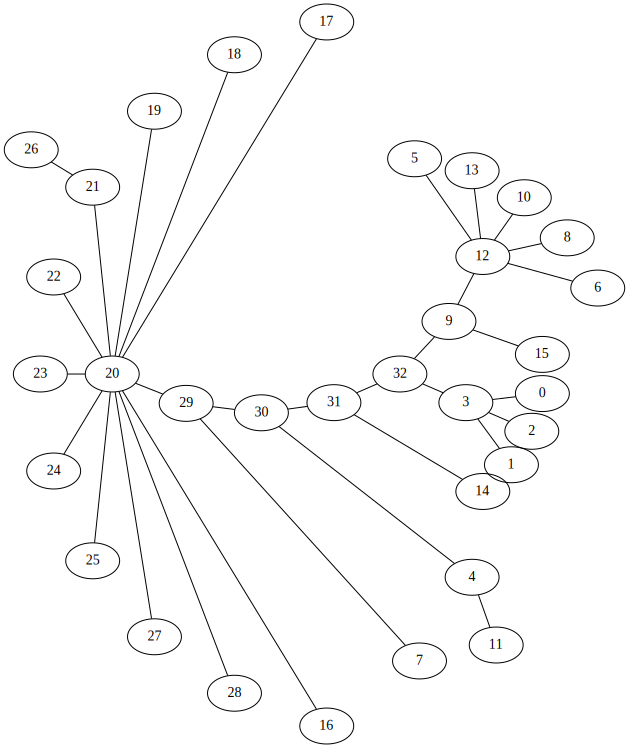

In [20]:
htgtwopi = htgraph
htgtwopi.layout(prog = 'twopi') #dot, neato
htgtwopi

In [21]:
print(htree)

Graph with 33 nodes and 32 edges


Infine il codice suggerito nell'esempio della libreria su github che dovrebbe fare l'embedding iperbolico nella sfera di Poincaré

In [25]:
root = 0 # label of root node
tau = 0.2 # scaling factor for edges
embed_2D = sarkar_embedding(htree, root)

# calculate hyperbolic distances from the embedding
poincare_dist(embed_2D[0,:], embed_2D[1,:])

mpf('13.5415049689921810956313416333948065262344806602730565246522638765648150962890484801109431898781359076918157073461')

In [26]:
embed_2D

matrix(
[['0.0', '0.0'],
 ['0.999996054343055057599834723280616742244333555469285665133623803668655282963438306740619195518673771165690709361', '0.00162185805429787760632711294729033072433050012725315522293679860913539794128104780068766856325827788793653362324'],
 ['0.999998684776982138389739097453498832050224844534551472165723075470589249607516050256908264609149567248474549972', '6.54629463644976545461472140877279585941959258956965305125955559091788966931767468507580609599504737972284731586e-116'],
 ['0.998379448638012785915837048495068465164657602728711540112783537201332739930228766620246488448281721666977507822', '0.0'],
 ['0.999998682311425137903173113326055555592779027344133247637201477468713404068460022662020259005082271351301353144', '-0.00162338393695954108274862431871952719758876818939045956957180093332021574799504586154664087046037278965428364383'],
 ['0.99999868723792218957070917206443287129350949363110257378647342442231138358846728720808646108297205933721410103', '-0.001620

In [27]:
embed_2D[2, :] - embed_2D[1, :]

matrix(
[['0.0000026304339270807899043741728820898058912890652658070320992718019339666440777435162890690904757960827838406116367', '-0.00162185805429787760632711294729033072433050012725315522293679860913539794128104780068766856325827788793653362324']])

Codice di preparazione per H-depp

In [29]:
#sarkar_embedding??

In [31]:
tree_dist = dict(all_pairs_shortest_path_length(htree))

In [85]:
tree_dist[0][3]

1

In [72]:
emb_dist = {}

In [77]:
for i in range (0, embed_2D.rows):
    temp_dict = {}
    for j in range (0, embed_2D.rows):
        jnode = list(htree.nodes)[j]
        temp_dict[jnode] = poincare_dist(embed_2D[i,:], embed_2D[j,:])
    inode = list(htree.nodes)[i]
    emb_dist[inode] = temp_dict

In [86]:
emb_dist[0][3]

mpf('13.5415049689921810956313416333948065262344806602730565246522638765648150962890484801109431898781359076918157073461')